<a href="https://colab.research.google.com/github/CrAvila/IA/blob/main/Taller1/IA_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div>
<img src="https://drive.google.com/uc?export=download&id=1lhTXu7FShFdtXWptJH3ZOPyxOdFY8kOf" width="500"/>
</div>


## Pontificia Universidad Javeriana

#### Departamento de Ingeniería Electrónica

#### Inteligencia Artificial

## Taller 1: Modelos Probabilísticos

Alumno: Carlos Roberto Ávila Hernández

Profesor: Alexander Caicedo Dorado

# Introducción

En el ámbito de la Inteligencia Artificial, los modelos probabilísticos son herramientas esenciales para dar sentido a la información compleja. En este taller se explora la aplicación práctica de los modelos probabilísticos, concretamente en el uso probabilidad Bayesiana para para predecir la probabilidad de que una persona sufra un accidente cerebrovascular.

El taller comienza introduciendo el concepto de modelos probabilísticos y su relevancia en el análisis de datos sanitarios. El objetivo es lograr discernir las variables significativas que influyen en la aparición de este fenómeno, así como la clasificación del riesgo de un individuo dadas ciertas condiciones. 

El taller culmina con una evaluación del rendimiento del modelo utilizando un conjunto independiente de datos para las pruebas. Esta evaluación mide la precisión del modelo a la hora de predecir la aparición de accidentes cerebrovasculares, indicando sobre su fiabilidad y eficacia, así como proponiendo mejoras y conluyendo sobre los resultados. 

Según la Organización Mundial de la Salud (OMS), lso accidentes cerebrovasculares son la segunda causa de muerte en el mundo, responsable de aproximadamente el 11% del total de fallecimientos.

Este conjunto de datos se utiliza para predecir la probabilidad de que un paciente sufra uno en función de parámetros como el sexo, la edad, diversas enfermedades y el hábito de fumar. Cada fila de los datos proporciona información relevante sobre el paciente.

Información de los Atributos:

1. **id**: Unique identifier

2. **gender**: "Male", "Female", or "Other"

3. **age**: Age of the patient

4. **hypertension**: 0 if the patient does not have hypertension, 1 if the patient has hypertension

5. **heart_disease**: 0 if the patient does not have any heart disease, 1 if the patient has a heart disease

6. **ever_married**: "No" or "Yes"

7. **work_type**: "Children", "Govt_job", "Never_worked", "Private", or "Self-employed"

8. **residence_type**: "Rural" or "Urban"

9. **avg_glucose_level**: Average glucose level in blood

10. **bmi**: Body mass index

11. **smoking_status**: "Formerly smoked", "Never smoked", "Smokes", or "Unknown"

12. **stroke**: 1 if the patient suffered a stroke, 0 otherwise


# Procesamiento de Datos

In [98]:
!pip install pandas
!pip install numpy
!pip install matplotlib

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
from itertools import combinations

In [102]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1NYlG6ZYmh-TdHgEuzTz1K-yfFxIoFEUC')

In [101]:
display(data)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Categorización de variables cuantitativas

 Al transformar los datos continuos en categorías significativas, pretendemos comprender mejor el impacto de estas variables en la predicción de los accidentes cerebrovasculares. De esta manera, podemos conglomerar muchos resultados similares que no necesariamente deberían tener su propia rama en un árbol de probabilidades. 

#### Edad

La variable "age" proporciona información sobre las diferentes etapas de la vida que podrían influir en el riesgo de ictus. Categorizaremos la edad en los siguientes grupos:

- **Niño**: De 0 a 18 años
- **Adultos**: De 18 a 65 años
- **Mayores**: 65 años o más

Categorizar la edad nos ayuda a captar los factores de riesgo relacionados con la edad y a diferenciar la susceptibilidad al ACV entre los distintos grupos de edad.

#### Nivel medio de glucosa

La variable "avg_glucose_level" refleja los niveles de glucosa en sangre, que pueden ser indicativos del riesgo de ACV. Categorizaremos los niveles medios de glucosa de la siguiente manera:

- **Bajo**: Nivel de glucosa de 0 a 80 mg/dL.
- **Normal**: Nivel de glucosa de 80 a 120 mg/dL
- **Alto**: Nivel de glucosa igual o superior a 120 mg/dL

La categorización de los niveles de glucosa nos permite discernir la relación entre la glucemia y el riesgo de ACV, ayudando a identificar posibles factores de riesgo.

#### Índice de masa corporal (IMC)

La variable "bmi" proporciona información sobre los factores de riesgo de ictus relacionados con el peso. Categorizaremos el IMC en los siguientes grupos:

- **Peso insuficiente**: IMC de 0 a 18,5
- **Normal**: IMC de 18,5 a 25
- **Sobrepeso**: IMC igual o superior a 25
- **Desconocido**: Se desconoce el valor del IMC

La categorización del IMC ayuda a comprender cómo se relacionan las categorías de peso con el riesgo de ACV y a identificar posibles factores de riesgo.

Adicionalmente, se mapean las variables con respuestas "Yes"/"No" para que tengan respuestas binarias estandarizadas al igual que las demás variables binarias.

El fundamento de la categorización de variables cuantitativas radica en la simplificación del análisis de datos y la mejora de la interpretabilidad. La categorización nos permite identificar patrones, tendencias y factores de riesgo potenciales que contribuyen a la aparición de ictus. Al agrupar los datos en categorías significativas, podemos integrar eficazmente estas variables en modelos predictivos y tomar decisiones informadas en escenarios de atención sanitaria.

In [103]:
events = {
    "quantitative" : {

        "age": {
            "ranges" : [
                (0,18),
                (18,65),
                (65, float('inf'))
            ],

            "categories" : [
                'Child',
                'Adult',
                'Senior'
            ]
        },

        "avg_glucose_level": {
            "ranges" : [
                (0,80),
                (80,120),
                (120, float('inf'))
            ],

            "categories" : [
                'Low',
                'Normal',
                'High'
            ]
        },

        "bmi": {
            "ranges": [
                (0,18.5),
                (18.5, 25),
                (25, float('inf'))
            ],

            "categories": [
                'Underweight',
                'Normal',
                'Overweight',
                'Unknown'
            ]
        }
    },

    "qualitative" :  {
        "gender" : data['gender'].unique().tolist(),
        "work_type": data['work_type'].unique().tolist(),
        "Residence_type" : data['Residence_type'].unique().tolist(),
        "smoking_status" : data['smoking_status'].unique().tolist()
    },

    "boolean" : {
        "hypertension" : {
            "statuses" : [0,1]
        },

        "heart_disease" : {
            "statuses" : [0,1]
        },

        "ever_married" : {
            "statuses" : [0,1]
        } ,

        "stroke" : {
            "statuses" : [0,1]
        }
    }
}

In [104]:
#Function to process original data
def process_data(df, variables_to_use):

    processed_dataframe = df.copy()

    #Classify que quantitative values
    for quantitative_column in list(events['quantitative'].keys()):

        #Specific function to classify the column value
        def categorize(value):
            if isinstance(value, int) or isinstance(value, float):
                for i, (lower, upper) in enumerate(events["quantitative"][quantitative_column]["ranges"]):
                    if lower <= value < upper:
                        return events["quantitative"][quantitative_column]["categories"][i]
            else:
                return value

        # Replace value into the processed dataframe
        processed_dataframe[quantitative_column] = processed_dataframe[quantitative_column].apply(categorize)

    replace_mapping = {
        "No" : 0,
        "Yes" : 1
    }

    processed_dataframe['ever_married'] = processed_dataframe['ever_married'].replace(replace_mapping)

    new_columns = [col for col in variables_to_use]
    new_columns.append('stroke')

    cols_to_drop = [col for col in data.columns.values.tolist() if col not in new_columns]
    cols_to_drop = [col for col in cols_to_drop if col in processed_dataframe.columns.tolist()]

    processed_dataframe = processed_dataframe.drop(columns=cols_to_drop)
    processed_dataframe.fillna('Unknown', inplace=True)

    processed_dataframe = processed_dataframe[new_columns]

    return processed_dataframe

In [108]:
processed_data = process_data(data, [col for col in data.columns.tolist() if col != 'id' and col != 'stroke'])

display(processed_data)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senior,0,1,1,Private,Urban,High,Overweight,formerly smoked,1
1,Female,Adult,0,0,1,Self-employed,Rural,High,Unknown,never smoked,1
2,Male,Senior,0,1,1,Private,Rural,Normal,Overweight,never smoked,1
3,Female,Adult,0,0,1,Private,Urban,High,Overweight,smokes,1
4,Female,Senior,1,0,1,Self-employed,Rural,High,Normal,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,Senior,1,0,1,Private,Urban,Normal,Unknown,never smoked,0
5106,Female,Senior,0,0,1,Self-employed,Urban,High,Overweight,never smoked,0
5107,Female,Adult,0,0,1,Self-employed,Rural,Normal,Overweight,never smoked,0
5108,Male,Adult,0,0,1,Private,Rural,High,Overweight,formerly smoked,0


In [8]:
def split_data(df, test_percentage):
    # Separate data into stroke and no stroke groups
    stroke_group = df[df['stroke'] == 1]
    no_stroke_group = df[df['stroke'] == 0]

    # Shuffle records in both groups
    stroke_group_shuffled = stroke_group.sample(frac=1, random_state=42).reset_index(drop=True)
    no_stroke_group_shuffled = no_stroke_group.sample(frac=1, random_state=42).reset_index(drop=True)

    # Calculate the number of records needed for 20 %
    num_test_stroke = int(test_percentage * len(stroke_group_shuffled))
    num_test_no_stroke = int(test_percentage * len(no_stroke_group_shuffled))

    # Create test and training sets for the no stroke group
    test_set_no_stroke = no_stroke_group_shuffled[:num_test_no_stroke]
    train_set_no_stroke = no_stroke_group_shuffled[num_test_no_stroke:]

    # Create test and training set for the stroke group
    test_set_stroke = stroke_group_shuffled[:num_test_stroke]
    train_set_stroke = stroke_group_shuffled[num_test_stroke:]

    # Combine test sets
    final_test_set = pd.concat([test_set_stroke, test_set_no_stroke])

    # Combine train sets
    final_train_set = pd.concat([train_set_stroke, train_set_no_stroke])

    return final_test_set, final_train_set

# Selección de Variables

Ahora debemos escoger qué variables utilizar para nuestro modelo probabilístico. Para determinar las variables más significativas, existen muchas herramientas estadísticas que se podrían utilizar, además de cierto conocimiento técnico en el área, sin embargo en este acercamiento se tratará de estudiar algunos comportamientos básicos de las variables de manera intuitiva y ver si tienen algún tipo de correlación.

Para ello, estudiaremos los perfiles por separado de las personas que sí tuvieron un ACV, y los que no, así como los datos en general.

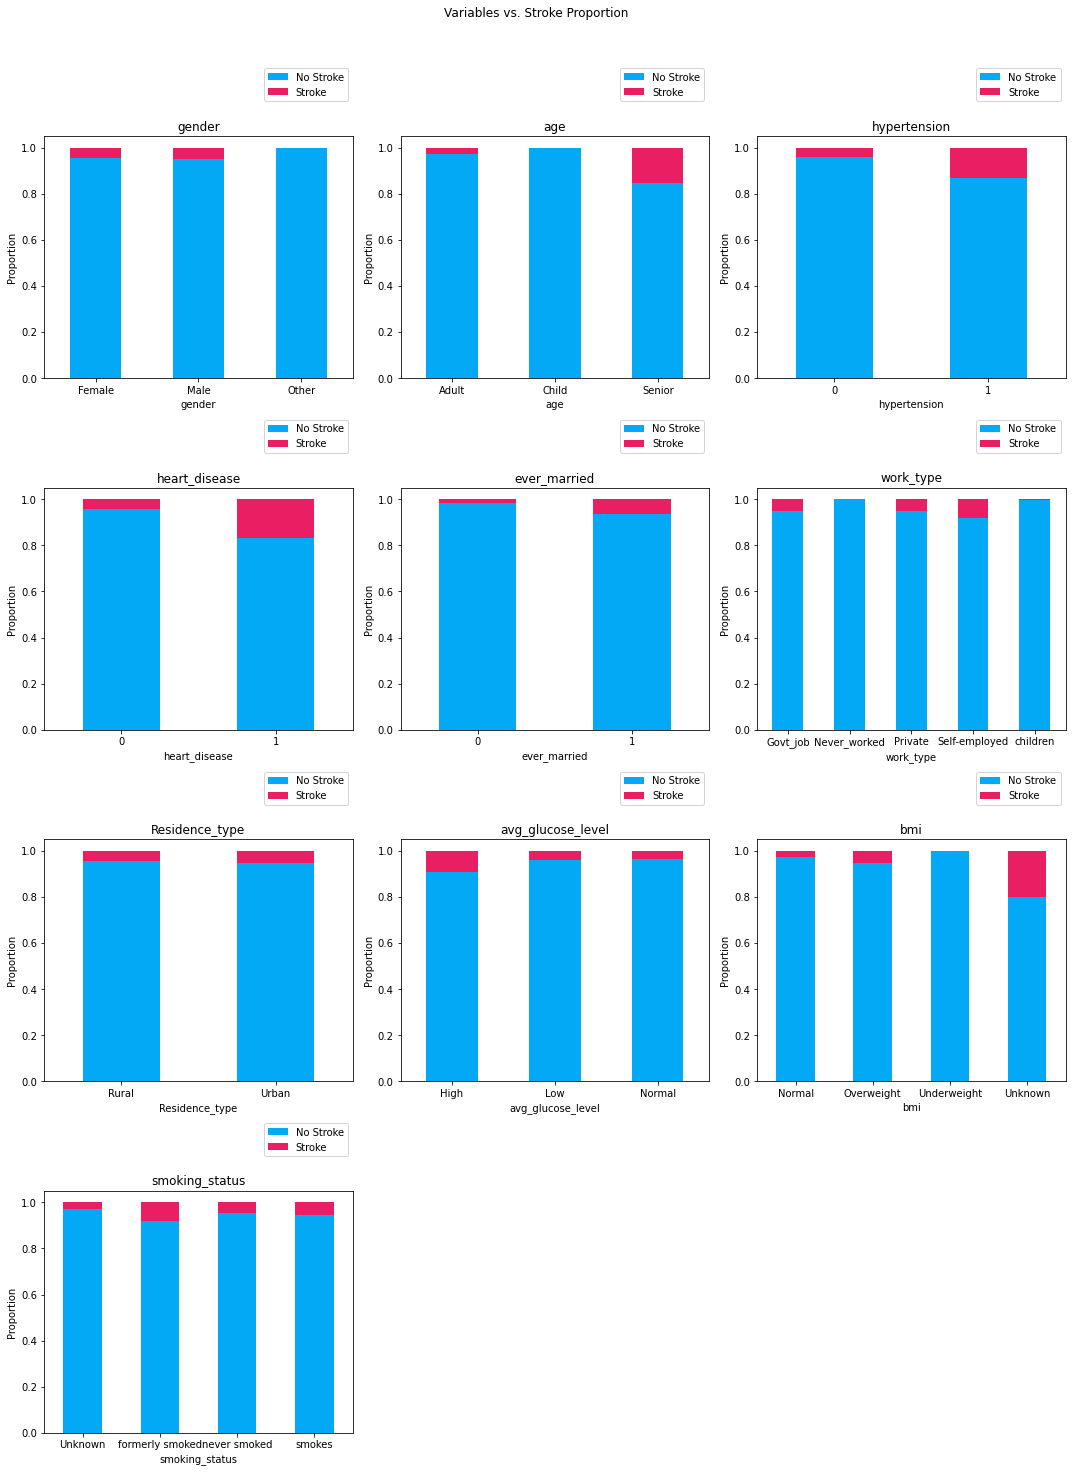

In [197]:
categorical_vars = [col for col in processed_data.columns.tolist() if col != 'stroke']

blue_rgb = (0.01176471, 0.6627451, 0.95686275)   
red_rgb = (0.91372549, 0.11764706, 0.38823529)
           
colors = [blue_rgb, red_rgb]

cmap = ListedColormap(colors)

num_plots = len(categorical_vars)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Variables vs. Stroke Proportion', y=1.02)

for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    
    if set(processed_data[var].unique()) == {0}:
        continue
    
    ax = axes[row, col]
    contingency_table = pd.crosstab(processed_data[var], processed_data['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Calculate proportions
    proportions = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    proportions.plot(kind='bar', stacked=True, ax=ax, cmap=cmap)
    ax.set_ylabel('Proportion')
    ax.set_xlabel(var)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["No Stroke", "Stroke"], loc="upper right", bbox_to_anchor=(1, 1.3))
    
    ax.set_title(var, position=(0.5, 1.15))
    
for i in range(len(categorical_vars), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [198]:
stroke_dataset = processed_data[processed_data['stroke'] == 1]
display(stroke_dataset)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,Senior,0,1,1,Private,Urban,High,Overweight,formerly smoked,1
1,Female,Adult,0,0,1,Self-employed,Rural,High,Unknown,never smoked,1
2,Male,Senior,0,1,1,Private,Rural,Normal,Overweight,never smoked,1
3,Female,Adult,0,0,1,Private,Urban,High,Overweight,smokes,1
4,Female,Senior,1,0,1,Self-employed,Rural,High,Normal,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,Adult,0,0,1,Private,Rural,Normal,Overweight,Unknown,1
245,Female,Child,0,0,0,children,Rural,Low,Overweight,Unknown,1
246,Female,Senior,0,0,1,Self-employed,Rural,Low,Overweight,formerly smoked,1
247,Male,Senior,1,0,1,Self-employed,Rural,Normal,Unknown,Unknown,1


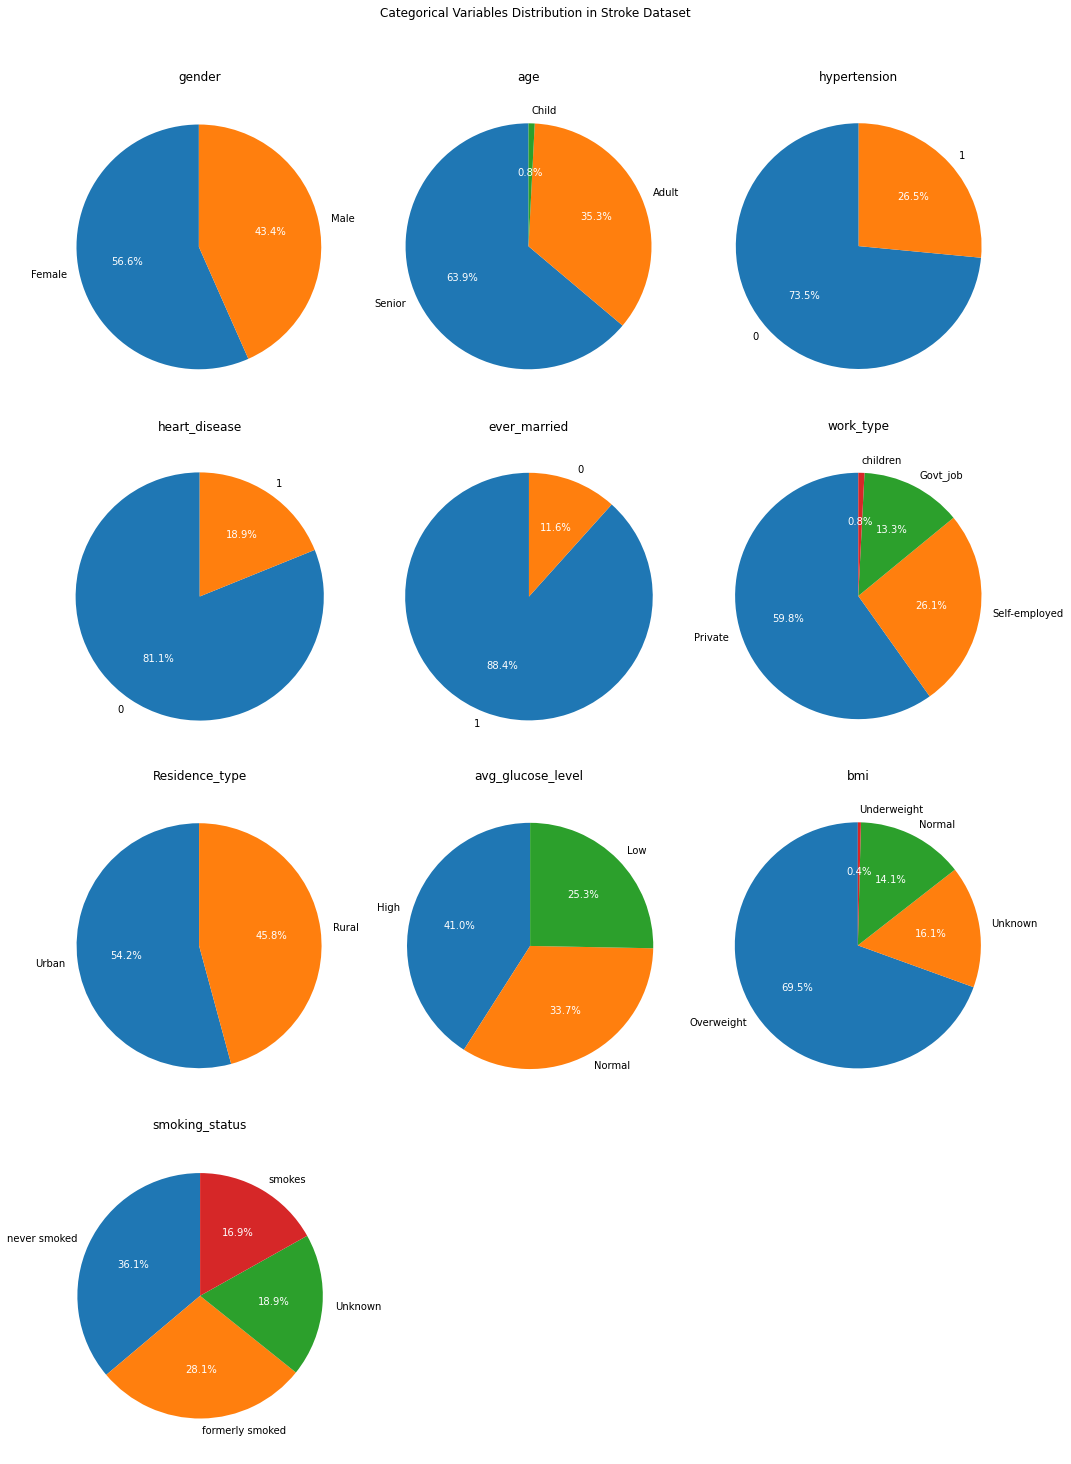

In [211]:

# Stroke dataset
stroke_dataset = processed_data[processed_data['stroke'] == 1]

# Colormap and number of colors
colormap = plt.cm.get_cmap('tab10', len(categorical_vars))

# CNumber of rows and columns for subplots
num_vars = len(categorical_vars)
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

# Subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Categorical Variables Distribution in Stroke Dataset', y=1.02)

for i, var in enumerate(categorical_vars):
    row = i // num_cols
    col = i % num_cols
    
    if set(stroke_dataset[var].unique()) == {0}:
        continue
    
    # Counts for the variable
    value_counts = stroke_dataset[var].value_counts()
    
    # Pie chart in the current subplot
    ax = axes[row, col]
    wedges, texts, autotexts = ax.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colormap.colors, startangle=90)
    for autotext in autotexts:
        autotext.set_color('white') 
    ax.set_title(var)
    ax.axis('equal')

for i in range(num_vars, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()


Al analizar en detalle las estadísticas, emergen patrones significativos entre los individuos que han experimentado un ACV:

- **Edad:** Se observa una predominancia de pacientes en la categoría de 65 años en adelante (clase Senior). Este hallazgo es congruente con la literatura médica, que indica que la edad es un factor de riesgo importante para los ACVs.

- **Nivel Promedio de Glucosa:** Se observa que el nivel promedio de glucosa es más alto en aquellos que han tenido un ACV. Esto podría estar relacionado con la diabetes, un factor conocido de riesgo para los ACVs. 

- **Estado Civil:** La mayoría de los pacientes que han experimentado un ACV están casados. Sin embargo, es necesario considerar que esta variable puede estar relacionada con la edad, ya que las personas mayores son más propensas a haber estado casadas en algún momento de sus vidas.

- **Índice de Masa Corporal (IMC):** El IMC tiende a ser más alto en los pacientes con ACV. Un IMC elevado se ha vinculado con un mayor riesgo de enfermedades cardiovasculares, incluidos los ACVs.

- **Hipertensión y Enfermedades Cardíacas:** Las estadísticas muestran que un mayor porcentaje de personas con hipertensión y enfermedades cardíacas han sufrido ACVs. Esto es coherente con la evidencia científica que establece la relación entre estas afecciones y los eventos cerebrovasculares.

No obstante, es importante reconocer la diferencia entre correlación y causalidad al interpretar estos patrones. Por ejemplo, el mayor porcentaje de pacientes casados no necesariamente implica que el matrimonio sea una causa directa de ACVs. Puede ser que la edad sea un factor confundidor, ya que las personas mayores tienen más probabilidades de haber estado casadas y también de sufrir ACVs.

Las variables seleccionadas para el modelo son fundamentales debido a su respaldo en la literatura médica y su coherencia con los factores de riesgo conocidos para los ACVs. La edad, el nivel de glucosa, el IMC, la hipertensión y las enfermedades cardíacas tienen evidencia científica sólida que respalda su contribución al riesgo de ACVs. Integrar estas variables en el modelo probabilístico permitirá capturar relaciones significativas y generar predicciones más precisas sobre el riesgo de ACVs en la población estudiada.

    

In [109]:
variables_to_use = [
    'age',
    'avg_glucose_level',
    'bmi',
    'hypertension',
    'heart_disease',
]

# Construcción del Modelo



Para empezar con la construcción del modelo, separaremos nuestros datos entre dos grupos. Uno será el conjunto de entrenamientos, con el cuál se determinarán todas las probabilidades del árbol, y el otro será un conjunto de prueba donde mediremos la exactitud del modelo con datos ajenos a los de entrenamiento. La proporción será del $20$ %, y se hará de forma separada para garantizar la presencia de ACVs positivos y negativos al ser un conjunto total de datos tan desbalanceado. 

In [215]:
processed_data = process_data(data, variables_to_use)
test_set, train_set = split_data(processed_data, 0.2)

In [216]:
display(test_set)
display(train_set)

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
0,Senior,High,Overweight,0,0,1
1,Senior,Low,Overweight,1,1,1
2,Adult,High,Overweight,0,1,1
3,Adult,High,Overweight,0,0,1
4,Senior,Normal,Unknown,0,0,1
...,...,...,...,...,...,...
967,Adult,Normal,Overweight,0,0,0
968,Child,Normal,Normal,0,0,0
969,Adult,Normal,Underweight,0,0,0
970,Adult,High,Overweight,0,0,0


,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke
49,Adult,Normal,Overweight,0,0,1
50,Senior,High,Overweight,1,0,1
51,Adult,Normal,Overweight,0,0,1
52,Adult,Low,Normal,0,0,1
53,Senior,Normal,Overweight,0,0,1
...,...,...,...,...,...,...
4856,Child,Low,Normal,0,0,0
4857,Adult,Normal,Overweight,1,0,0
4858,Adult,High,Overweight,0,0,0
4859,Child,Normal,Underweight,0,0,0


Ahora, se construirá el árbol de probabilidades con las variables seleccionadas. Esto se hará con un diccionario de Python, y se generalizará para pooder hacerlo con cualquier combinación de variables elegidas. Se iterará por todas las variables, y a partir de cada una se iterará en las variables restantes, para así poder sacar todas las combinaciones posibles. A medida pasa esto, se irán sacando las proporciones de cada rama y se acumulará la probabilidad de cada rama por medio de la multiplicación. De esta manera, tendremos la probabilidad condicional de cada variable dada la combinación de las anteriores (que serán las ramas del árbol) y cada nodo al que se llegue será el resultado de la multiplicación de las ramas anteriores, y representará la probabilidad de la intersección de las variables de ese camino. Esto se hará con un enfoque recursivo, para que cada rama tenga la información correspondiente de la rama anterior, pero que a la vez sea su propio conjunto universal y se pueda calcular la probabilidad de ese evento dados los ya anteriores. Al hacer esto, estamos garantizando que para los eventos del modelo se cumpla: 


$$P(A_1 \cap A_2 \cap \dots \cap A_n) = P\left(\bigcap_{i=1}^{n}A_i\right) = \prod_{i=2}^{n}P(A_i|A_n \cap \dots \cap A_{i-1})$$

$$P(B) = \sum_{i=1}^{n}P(A_i)P(B|A_i)$$

$$P(A_i | B) = \cfrac{P(A_i)P(B|A_i)}{\sum_{j}P(A_j|P(B|A_j))}$$


In [217]:
from pandas.io.formats.info import DataFrameInfo
def build_tree(data):

    count_dict = {}
    prob_dict = {}
    
    unique_values_dict = {
        column: data[column].unique().tolist() for column in data.columns
    }

    def calculate_probabilities(df, values_dict, conditions=(), index=0, accumulated_prob=1.0, prob_dict={}):

        # Return when the current variable is the last one 
        if index == len(categories):
            return

        # Get current categories and values
        current_category = categories[index]
        current_values = values_dict[current_category]

        # Iterate though current values
        for value in current_values:
            new_conditions = conditions + ((current_category, value),)

            filtered_df = df
            for condition in new_conditions:
                column, val = condition
                filtered_df = filtered_df[filtered_df[column] == val]

            # Calculate the count and probability of current branch, if the count is zero then divide by 1
            count = len(filtered_df)
            prob = count / (len(df) or 1)
            branch_prob = accumulated_prob * prob

            if index not in prob_dict:
                prob_dict[index] = {}
                count_dict[index] = {}

            # Store the count and the probability of the branch
            prob_dict[index][new_conditions] = branch_prob
            count_dict[index][new_conditions] = count

            next_index = index + 1
            calculate_probabilities(filtered_df, values_dict, new_conditions, next_index, accumulated_prob, prob_dict)
    
    # Get categories
    categories = list(unique_values_dict.keys())
    # Calculate probabilities and counts of next branch
    calculate_probabilities(data, unique_values_dict, prob_dict=prob_dict)

    return count_dict, prob_dict

In [12]:
# Calculate counts and probabilities as a tree
count_tree, probability_tree = build_tree(train_set)

In [218]:
def format_condition(condition, type):
    abbreviated_conditions = [f"{str(col)[0].capitalize()}{str(val)[0]}" for col, val in condition]

    formatted_condition = ""

    if type == "conditional":
        if len(abbreviated_conditions) > 1:
            event = abbreviated_conditions[-1]
            previous_events = abbreviated_conditions[:-1]

            formatted_condition = f"{event} | {' ^ '.join([condition for condition in previous_events])}"
        else:
            formatted_condition = abbreviated_conditions[0]
    else:
        formatted_condition = f"{' ^ '.join([condition for condition in abbreviated_conditions])}"

    return formatted_condition

def print_dict_as_tree(probs, counts):
    for (key, value), (key2, value2) in zip(probs.items(), counts.items()):
        if isinstance(key, tuple):
            formatted_key = format_condition(key, "conditional")
        else:
            formatted_key = f"\nVariables: {key+1}\n"

        if isinstance(value, dict):
            print(formatted_key)
            print_dict_as_tree(value, value2)
        else:
            p = value2/len(train_set)
            formatted_intersection = format_condition(key, "intersection")
            conditional_string = f"P({formatted_key}) = {'{0:.10f}'.format(value)}"
            intersection_string = f"P({formatted_intersection}) = {'{0:.10f}'.format(p)}"
            print(f"{conditional_string} -> {intersection_string}")

print_dict_as_tree(probability_tree, count_tree)


Variables: 1

P(AA) = 0.6255808266 -> P(AA) = 0.6255808266
P(AS) = 0.2029836146 -> P(AS) = 0.2029836146
P(AC) = 0.1714355588 -> P(AC) = 0.1714355588

Variables: 2

P(AN | AA) = 0.4933541830 -> P(AA ^ AN) = 0.3086329176
P(AH | AA) = 0.1993745113 -> P(AA ^ AH) = 0.1247248716
P(AL | AA) = 0.3072713057 -> P(AA ^ AL) = 0.1922230374
P(AN | AS) = 0.4096385542 -> P(AS ^ AN) = 0.0831499144
P(AH | AS) = 0.3301204819 -> P(AS ^ AH) = 0.0670090487
P(AL | AS) = 0.2602409639 -> P(AS ^ AL) = 0.0528246515
P(AN | AC) = 0.5278174037 -> P(AC ^ AN) = 0.0904866716
P(AH | AC) = 0.1540656205 -> P(AC ^ AH) = 0.0264123258
P(AL | AC) = 0.3181169757 -> P(AC ^ AL) = 0.0545365615

Variables: 3

P(BO | AA ^ AN) = 0.7329635499 -> P(AA ^ AN ^ BO) = 0.2262166789
P(BN | AA ^ AN) = 0.2297939778 -> P(AA ^ AN ^ BN) = 0.0709219858
P(BU | AA ^ AN) = 0.0309033281 -> P(AA ^ AN ^ BU) = 0.0095377843
P(BU | AA ^ AN) = 0.0063391442 -> P(AA ^ AN ^ BU) = 0.0019564686
P(BO | AA ^ AH) = 0.7666666667 -> P(AA ^ AH ^ BO) = 0.0956224016


Ahora, tenemos todo el árbol de probabilidades, indicando la probabilidad de cada rama así como la probabilidad de la intersección de todas las variables. Se ha sumarizado la notación, para representar los eventos de manera más compacta y a continuación se muestra su abreviatura: 

   - Age ($A$):
     - Child: $A_C$
     - Adult: $A_A$
     - Senior: $A_S$
   - Avg Glucose Level ($G$):
     - Low: $G_L$
     - Normal: $G_N$
     - High: $G_H$
   - BMI ($B$):
     - Underweight: $B_U$
     - Normal: $B_N$
     - Overweight: $B_O$
     - Unknown: $B_K$
   - Hypertension ($H$):
     - No Hypertension: $H$
     - Hypertension: $H^C$
   - Heart Disease ($H$):
     - No Heart Disease: $H$
     - Heart Disease: $H^C$
   - Stroke ($S$):
     - No Stroke: $S$
     - Stroke: $S^C$
     
Al hacer la equivalencia entre la nomenclatura definida, y el árbol generado, hay que tener en cuenta la posición de las variables ya que en el árbol solo se toman las iniciales de las variables y sus posibles valores, por eso es que Hypertension y Heart Disease están representados como H. Esto no afecta en ninguna manera las probabilidades, solo hay que tenerlo en cuenta para su imprresión en consola para su legibilidad, ya que en el diccionario si se manejan los nombres de las variables y sus valores en completitud para evitar cualquier tipo de ambigüedad. Por ejemplo, uno de los grupos más susceptibles es el de las personas mayores de edad, con glucosa alta, sobrepeso, hipertensión y enfermedad del corazón. 

La probabilidad de sufrir un ACV dadas estas condiciones, es mostrada como: ```P(S1 | AS ^ AH ^ BO ^ H1 ^ H1) = 0.2857142857```

Y la probabilidad de tener un ACV y además tener todas esas condiciones: ```P(AS ^ AH ^ BO ^ H1 ^ H1 ^ S1) = 0.0009782343```

Esto lo podemos comprobar haciendo la multiplcación de las ramas que llevan hacia ese camino, y lo mismo aplica para todas las ramas posibles. 

## Evaluación del Modelo

Ahora que ya tenemos las probabilidades de todas las ramas posibles y todas las intersecciones posibles, nos interesa concretamente el nivel de altura $5$ del árbol de probabilidades, ya que ahí se encuentra la probabilidad de tener un accidente cerebrovascular dadas ya ciertas combinaciones de variables. Ahora, hay que obtener estas probabilidades introduciendo únicamente los valores de las variables a evaluar.

Al ingresar los datos de la siguiente manera, obtenemos la probabilidad condicional correspondiente a las variables de entrada:

In [14]:
try:
    print(probability_tree[5][(
    ('age', 'Child'),
    ('avg_glucose_level', 'Low'),
    ('bmi', 'Overweight'),
    ('hypertension', 0),
    ('heart_disease', 0),
    ('stroke', 1)
    )])
except:
    print('Other variables used.')

0.023809523809523808


Por lo que podemos construir una función que retorne directamente los resultados al ingresar las variables:

In [15]:
def get_probability(model, variables, input_data, events):

    # Categorize the quantitative variables
    def get_from_tree(variable, value, events):
        if isinstance(value, str):
            return value

        if variable in events['quantitative']:
            ranges = events['quantitative'][variable]['ranges']
            categories = events['quantitative'][variable]['categories']
            for i, (lower, upper) in enumerate(ranges):
                if lower <= value < upper:
                    return categories[i]
        return value

    # Create the tuple of tuples for the input
    categorized_input = []
    for variable, value in zip(variables, input_data):
        categorized_value = get_from_tree(variable, value, events)
        categorized_input.append(categorized_value)

    input_tuple = tuple((variable, value) for variable, value in zip(variables,categorized_input))

    # Specific for this model
    key = input_tuple + (('stroke', 1),)

    # Extract probability
    probability = model[len(variables)][key]

    return probability


In [16]:
try:
    print(get_probability(probability_tree, variables_to_use, [10,70,30, 0, 0], events))
except:
    print("Other variables used.")

0.023809523809523808


De esta manera obtenemos la probabilidad según las variables de entrada (que pueden ser cualquiera de las que estén definidas en la lista de variables a utilizar y en el mismo orden) ya que si son numéricas se categorizan y luego se extrae la probabilidad del árbol. Sin embargo, lo que nos interesa es llegar a categorizar este resultado, ya que queremos obtener una respuesta cerrada que indique si la persona con dichos datos es entrada está en riesgo o no. Aquí hay muchas maneras en las que podemos hacer la clasificación. La manera más sencilla de hacer esto podría ser con una simulación de tipo Monte Carlo, donde se genere un número aleatorio y si este es menor que la probabilidad entonces se clasifica como en riesgo:

In [219]:
import random

def get_stroke_risk(model, variables, input_data):
    probability = get_probability(model, variables, input_data, events)
    
    rgn = random.random()

    risk = 0

    if rgn < probability:
        risk = 1

    return risk

In [220]:
try:
    print(get_stroke_risk(probability_tree, variables_to_use, [10,70,30, 0, 0]))
except:
    print("Other variables used.")

0


Ahora, debemos hacer esto con todas las entradas del conjunto de pruebas y evaluar la exactituda del modelo.

In [221]:
def evaluate_model(model, variables, test_set):

    correct_predictions = 0
    correct_stroke_predictions = 0
    correct_no_stroke_predictions = 0

    for index, row in test_set.iterrows():

        stroke_risk = get_stroke_risk(model, variables, [row[var] for var in variables])
        real_value = row['stroke']

        if real_value == stroke_risk:
            correct_predictions += 1

            if real_value == 1:
                correct_stroke_predictions += 1
            else:
                correct_no_stroke_predictions += 1

        #print(f"Real Value: {real_value} Prediction: {stroke_risk}")

    general_accuracy = correct_predictions/test_set.shape[0] * 100
    stroke_accuracy = correct_stroke_predictions/test_set[test_set["stroke"] == 1].shape[0] * 100
    no_stroke_accuracy = correct_no_stroke_predictions/test_set[test_set["stroke"] == 0].shape[0] * 100

    return general_accuracy, stroke_accuracy, no_stroke_accuracy

Ahora podemos comprobar la exactituda del modelo en una evaluación del conjunto de pruebas: 

In [222]:
evaluate_model(probability_tree, variables_to_use, test_set)

(91.77277179236043, 12.244897959183673, 95.78189300411523)

Y realizar más pruebas para ver en promedio cual es la exactitud del modelo:

In [223]:
def multiple_tests(model, n, test_set, variables):
    accuracy_dict = {
        "correct_predictions" : [],
        "correct_stroke_predictions" : [],
        "correct_no_stroke_predictions" : []
    }

    
    for _ in range(n):
        ga, sa, nsa = evaluate_model(model, variables, test_set)
        accuracy_dict["correct_predictions"].append(ga)
        accuracy_dict["correct_stroke_predictions"].append(sa)
        accuracy_dict["correct_no_stroke_predictions"].append(nsa)

    # Calculate averages
    ga_avg = sum(accuracy_dict["correct_predictions"])/len(accuracy_dict["correct_predictions"])
    sa_avg = sum(accuracy_dict["correct_stroke_predictions"])/len(accuracy_dict["correct_stroke_predictions"])
    nsa_avg = sum(accuracy_dict["correct_no_stroke_predictions"]) / len(accuracy_dict["correct_no_stroke_predictions"])

    return ga_avg, sa_avg, nsa_avg


results = multiple_tests(probability_tree, 100, test_set, variables_to_use)

print(f"General Accuracy: {results[0]}")
print(f"Stroke Accuracy: {results[1]}")
print(f"No Stroke Accuracy: {results[2]}")

(91.98432908912834, 16.387755102040792, 95.79526748971195)

En el análisis de resultados, se presentan en el formato de exactitud general ($91$%), exactitud en casos de ACV ($16$%) y exactitud en casos sin ACV ($95$%). Se observa que, en general, se logra una buena precisión. Sin embargo, debido al desbalance en el conjunto de datos, esta aparente precisión se ve empañada por un rendimiento deficiente en la predicción de personas que sí han sufrido un ACV.

En este punto, surge la pregunta de la priorización: ¿Es peor cometer un falso negativo o un falso positivo? En este contexto, parece que otorgar mayor importancia a los falsos negativos es fundamental. Si una persona con riesgo real de sufrir un ACV no es identificada a tiempo, las consecuencias podrían ser trágicas y de alto costo. En contraste, si una persona que no está en riesgo es catalogada como potencialmente afectada, los procedimientos médicos o exámenes adicionales, en el peor de los casos, pueden prevenir riesgos futuros y resultar en gastos menores. Estos costos y molestias son comparativamente menores en comparación con el impacto devastador de un ACV.

Por tanto, es crucial priorizar la precisión en la detección de personas en riesgo real de sufrir un ACV. Esta consideración nos guiará hacia un enfoque más efectivo y significativo en la toma de decisiones y en la prevención de posibles tragedias de salud a largo plazo.

Para ello, debemos encontrar una mejor manera de clasificarlos, y sin recurrir a métodos muy sofisticados podríamos consierar el costo de los falsos positivos y los falsos negativos y así compensar el desbalance de datos, o bien fijar un punto de corte para el cual cierta probabilidad ya se considere riesgosa. Existen muchas maneras de determinar probabilísticamente si alguien está en riesgo de un ACV y mucha literatura médica que mejor puede explicar estas clasificaciones, pero en esta exploración vamos a combinar la simulación (para tener un toque de aleatoriedad como en la vida real) así como un corte para el cual ya se considere riesgo. En este caso, se utilizará una cota de $5$ %. 

In [229]:
def get_stroke_risk(model, variables, input_data):
    probability = get_probability(model, variables, input_data, events)
    rgn = random.random()

    risk = 0

    if rgn < probability or probability > 0.05:
        risk = 1

    return risk


In [227]:
results = multiple_tests(probability_tree, 100, test_set, variables_to_use)

print(f"General Accuracy: {results[0]}")
print(f"Stroke Accuracy: {results[1]}")
print(f"No Stroke Accuracy: {results[2]}")

(78.45837414299712, 76.1428571428572, 78.57510288065842)

Como se puede oberservar, con este nuevo criterio de selección el 78 % de personas es catalogada de manera correcta, entre ellos el 76 % dentro del grupo de ACV y el 78 % en el grupo que no tuvo. Lo cual es una mejora considerable a costa de la precisión del conjunto general. Esta cota se determinó a partir de varios experimentos, donde se buscó que no se perdiera demasiada precisión en general, mientras se ganaba un poco de precisión en los casos de ACV positivo. Este será el modelo con el que nos quedaremos.

# Resultados

La precisión del modelo para categorizar a las personas con riesgo de accidente cerebrovascular se ve reforzada por la inclusión del nuevo umbral de selección. La técnica ajustada da como resultado que el 78% de los individuos sean clasificados correctamente, con un aumento significativo en la tasa de aciertos entre aquellos que han tenido un ACV (76%) y aquellos que no están afectados (78%).

Si bien la mejora es significativa, se produce a costa de la precisión en general.Se realizaron varios experimentos iterativos para determinar el límite, con el objetivo de mantener la precisión en la clasificación general pero también mejorarla en casos positivos de ACV. A partir de varias pruebas, se seleccionó manualmente una cota que aumentara la exactitud para los individuos con ACV positivo, sin comprometer demasiado la exactitud general del modelo. De esta manera, aproximadamente 8 de cada 10 personas serán clasificadas de manera correcta. 

La decisión de implementar este umbral se debe al desbalance enter la cantidad de personas que si tuvieron un ACV y las que no, además de el costo producido por no identificar esto correctamente. Sin embargo, hay muchas mejoras que se podrían hacer y se hablarán de ellas a continuación. 



## Posibles Mejoras

El modelo realizado hac euna clasificación sencilla, sin tener en cuenta una gran cantidad de factores. Una mejora se podría hacer en el criterio de clasificación. Como por ejemplo: 

1. **Múltiples Umbrales:** Definir múltiples umbrales específicos para cierto conjuntos de variables o poblaciones.

2. **Considerar Costos:** Definir los costos de una categorización equivocada para así balancear las probabilidades.

3. **Balanceo de Datos:** Al existir un desbalance muy grande entre los conjuntos de interés, se podría incluir más muetras del conjunto de ACV positivo y menos muestras de ACV negativo y así compensar un poco el desbalance. 

4. **Incorporar Más Características:** Es posible que las variables tomadas en cuenta no ofrezcan mucha información como se haría añadiendo más, así como estudiando las combinaciones de estas. Sin embargo, esto también podría reducir la exactitud del modelo ya que cada conjunto de características iría reduciendo la probabilidad en algunos casos. 

5. **Enriquecer Datos:** Encontrar fuentes adicionales de datos que puedan enriquecer el conjunto existente. Datos complementarios pueden proporcionar una perspectiva más completa y conducir a predicciones más precisas.

6. **Regularización:** Utilizar técnicas de regularización para evitar el sobreajuste y mejorar la generalización del modelo a nuevos datos.

7. **Validación Cruzada:** Utilizar la validación cruzada para evaluar el rendimiento del modelo en diferentes conjuntos de datos y verificar su consistencia.

8. **Análisis de Residuos:** Realizar un análisis de los residuos del modelo para identificar patrones en los errores de predicción y ajustar el modelo en consecuencia.

9. **Selección de variables**: En este modelo se consideraron 5 variables. ¿Existirá una combinación que maximice la exactitud entre los individuos con ACV? Este es un procedimiento fácil de realizar teniendo lo que hemos hecho hasta el momento. 


A continuación, se explorarán todas las combinaciones de variables posibles (escogiendo 5 de 10 posibles) y realizando un modelo con cada conjunto de variables para ver su exactitud.  



In [230]:
def build_model(variables, train_set):
    proc_data = process_data(train_set, variables)

    count_tree, probability_tree = build_tree(proc_data)
    
    #print_dict_as_tree(probability_tree, count_tree)

    return probability_tree

Esta es una operación extremadamente costosa para el ordenador, se hace solo con proppósitos explorativos ya que en total se considerarán $252$ modelos: 
    
$${10 \choose 5} = \frac{10!}{5!(10-5)!} = \frac{10 \times 9 \times 8 \times 7 \times 6}{5 \times 4 \times 3 \times 2 \times 1} = 252$$


In [231]:
def get_optimal_variables():
    variable_to_predict = "stroke"

    l = [item for item in data if item != variable_to_predict and item != 'id']

    variable_combinations = list(combinations(l, 5))
    
    max_combination = {
        "combo" : [],
        "accuracy" : 0,
        "stroke_accuracy" : 0,
        "no_stroke_accuracy" : 0
    }
    
    for comb in variable_combinations:
        generic_data = process_data(data, l)

        #display(generic_data)

        test_set, train_set = split_data(generic_data, 0.2)
        model = build_model(comb, train_set)
        #print(f"Combination of variables: {comb}")
        ga, sa, na = (multiple_tests(model, 10, test_set, comb))
        #ga, sa, na = (evaluate_model(model, comb, test_set))
    
        
        if sa > max_combination['stroke_accuracy']:
            max_combination['stroke_accuracy'] = sa
            max_combination['accuracy'] = ga
            max_combination['no_stroke_accuracy'] = na
            max_combination['combo'] = comb
    
    print("Max Combination:")
    for key, value in max_combination.items():
        if key == "combo":
            print(f"{key.capitalize()}: {value}")
        else:
            print(f"{key.replace('_', ' ').capitalize()}: {value:.3f}")

In [232]:
get_optimal_variables()

Max Combination:
Combo: ('gender', 'heart_disease', 'ever_married', 'work_type', 'Residence_type')
Accuracy: 37.375
Stroke accuracy: 86.327
No stroke accuracy: 34.907


Esta combinación de variables produce un modelo de clasificación que tiene una precisión del 86% para personas con accidente cerebrovascular. Sin embargo, esta mayor precisión da como resultado una disminución sustancial de la precisión en el otro caso (sin accidente cerebrovascular) y de la precisión general.

Este es el resultado de la naturaleza de las variables elegidas en el modelo. La probabilidad de predecir un accidente cerebrovascular puede ser mayor al incluir variables que no son altamente predictivas o significativas para determinar la probabilidad de tal ocurrencia, incluso si no están realmente presentes. La probabilidad de sufrir un derrame cerebral es alta, mientras que el resto de individuos tienen baja precisión.

Esto se debe a que el modelo está sesgado hacia la identificación de personas con accidente cerebrovascular (se priorizó la exactitud únicamente de ese conjunto de personas), ya que considera factores menos pertinentes ante este tipo de escenarios.Es crucial evaluar críticamente la importancia de cada variable y su efecto en el resultado del modelo. Al final el modelo resultó ser muy aleatorio, que el conjunto de ACV positivo resultó beneficiado de ello ya que la gran mayoría de los datos fueron considerados en riesgo. 

Esto abre más puertas hacia la mejora del modelo, por ejemplo, si se considera la variación entre las exactitudes, aunque eso podría llevar a que todas las precisiones sean parecidas y muy bajas. Entonces, se podría considerar la relación entre la exactitud y sus diferencias con las demás, etc. De momento, podemos concluir que si se realizó una elección relativamente correcta de las variables, ya que aportan bastante significancia a la hora de determinar si alguien está en riesgo de un ACV o no, y los resultados mejorados lo demuestran. 

## Conclusiones

A partir de todo el proceso que se realizó, se pueden hacer las siguientes conclusiones:

- **La métrica de evaluación más allá de la precisión**: Aunque la exactitud general es una métrica común, puede que no sea adecuada para todos los escenarios, especialmente con conjuntos de datos desequilibrados. En este caso vimos como se lograba una exactitud general del $91$, pero para el conjunto de interés solo $12$ %. Eso ejemplifica como la exactitud de un modelo no dice mucho sobre su eficacia para el propósito que fue construido. 

- **Análisis de umbrales**: Para ámbitos como este, al momento de predecir condiciones médicas no solo podemos hacer una conclusión basada en una probabilidad que sea mayo a otra, y esto se puede solventar de cierta manera con diferentes umbrales para encontrar el equilibrio óptimo entre falsos positivos y falsos negativos. Dependiendo de la aplicación, puede dar prioridad a un tipo de error sobre el otro.

- **Ingeniería y selección de variable**: Es necesario evaluar fondo la importancia de cada variable. La eliminación de características irrelevantes o altamente correlacionadas puede mejorar el rendimiento del modelo y reducir el sobreajuste o la carencia de este.

- **Consideraciones contextuales**: Comprender las implicaciones de las predicciones de los modelos en el mundo real. En este caso, al ser una cuestión delicada que puede llegar a determinar la salud de alguien, se tuvo que priorizar la categorización del riesgo para los ACV positivos ya que un error en esa categorización es mucho más costoso que un error para los negativos. Este análisis debería ser efectuado en la realización de todo modelo. 

- **Transparencia del modelo**: Los modelos transparentes, como este árbol, pueden ayudar a identificar características influyentes y proporcionar información sobre las predicciones. En este ejemplo, se pudo observar como a partir de ciertas combinaciones de variables las probabilidades son cero o completamente uno dadas ciertas condiciones, que pueden generar muchas conclusiones respecto al fenómeno estudiado. 

- **Preprocesamiento de datos**: Preparar los datos para su utilización, estudiar los valores atípicos y otros problemas de calidad de los datos para garantizar un rendimiento preciso del modelo. Incluso puede llegar a ser necesario estandarizar o normalizar las características, reordenarlas, categorizarlas y expresarlas de manera que puedan ser eficientemente referenciables y entendibles en el futuro. 

- **Conocimientos especializados**: No es suficiente con tener los conocimientos computacionales para realizar el modelo, ya que cada situación es diferente y no siempre se puede saber de manera intuitiva la correlación que tienen ciertas variables o las consecuencias e implicaciones que tienen estas. Es necesarrio aprender un poco del ámbito para comprender la importancia de las características y las posibles relaciones que podrían no ser captadas únicamente por los datos.

- **Proceso iterativo**: La creación de modelos probabilísticos eficaces es un proceso iterativo. Es necesario revisar y perfeccionar múltiples veces el modelo a medida que se disponga de nuevos datos, conocimientos del sector e incluso teniendo resultados, es necesario analizarlos y volver al proceso de creación para poder mejorarlo lo más posible. 